In [1]:
import cv2
import random
import time
import numpy as np
from scipy import misc

from matplotlib import pyplot as plt
from scipy import misc
%matplotlib inline
plt.style.use('ggplot')
import os
import sys
sys.path.append('../common/')
import utils
import skimage
from skimage.feature import local_binary_pattern

In [2]:
import pickle

In [18]:
import pickle
with open('./xy.pkl','rb') as whdl:
    (IM_train,y_train,IM_test) = pickle.load(whdl)

In [19]:
len(IM_train),len(y_train)

(58512, 58512)

In [20]:
from collections import Counter

In [21]:
Counter(y_train)

Counter({0: 55755, 1: 2757})

In [22]:

pb = utils.ProgressBar(worksum=len(IM_train))
pb.startjob()
features = []
targets = []
for one_image,one_target in zip(IM_train,y_train):
    one_feature = []
    if len(one_image.shape) != 3:
        continue
    if one_target == 0 and random.random() > 0.2:
        pb.complete(1)
        continue
    features.append(one_image)
    targets.append(one_target)
    pb.complete(1)

 99.76 % [=================================================>-] 58371/58512 	 used:2s eta:0 s

In [23]:
Counter(targets)

Counter({0: 11082, 1: 2751})

In [24]:
len(features),len(targets)

(13833, 13833)

In [25]:
train_x,val_x = features[:-1000], features[-1000:]
train_y,val_y = targets[:-1000], targets[-1000:]

In [26]:
train_x[0].shape

(100, 100, 3)

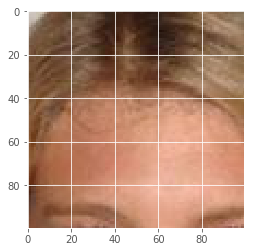

In [16]:
plt.imshow(train_x[0])

In [28]:
len(train_x[0].reshape(-1))

30000

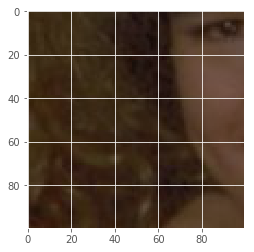

In [33]:
plt.imshow(np.asarray(train_x[-i] * 0.5,np.uint8)) 

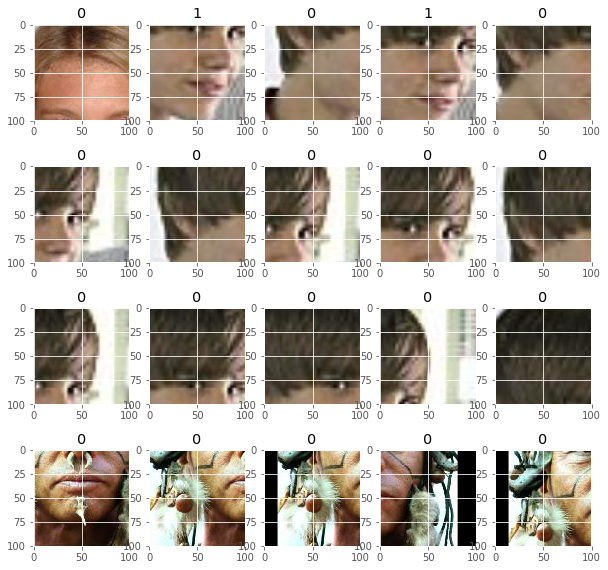

In [15]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i + 1)
    plt.imshow(train_x[-i])
    plt.title(train_y[-i])

In [13]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [14]:
import keras

Using TensorFlow backend.


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import merge
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.models import Model
from keras.models import Sequential

In [16]:

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=train_x[0].shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
activation_3 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 94, 94, 32)        9248      
__________

In [18]:
#opt = keras.optimizers.SGD(lr=0.01, decay=1e-6)
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [19]:
# Let's train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [20]:
train_x = np.asarray(train_x)

In [21]:
val_x = np.asarray(val_x)

In [22]:
train_x.shape,val_x.shape

((12932, 100, 100, 3), (1000, 100, 100, 3))

In [23]:
model.fit(train_x, train_y,
              batch_size=128,
              epochs=7,
              validation_data=(val_x, val_y),
              shuffle=True)

Train on 12932 samples, validate on 1000 samples
Epoch 1/7
12932/12932 [==============================] - 70s - loss: 0.5763 - acc: 0.8063 - val_loss: 0.4143 - val_acc: 0.8370
Epoch 2/7
12932/12932 [==============================] - 65s - loss: 0.3178 - acc: 0.8810 - val_loss: 0.2640 - val_acc: 0.9050
Epoch 3/7
12932/12932 [==============================] - 65s - loss: 0.2192 - acc: 0.9226 - val_loss: 0.3721 - val_acc: 0.8550
Epoch 4/7
12932/12932 [==============================] - 65s - loss: 0.1797 - acc: 0.9408 - val_loss: 0.4623 - val_acc: 0.8380
Epoch 5/7
12932/12932 [==============================] - 65s - loss: 0.1546 - acc: 0.9509 - val_loss: 0.1898 - val_acc: 0.9280
Epoch 6/7
12932/12932 [==============================] - 65s - loss: 0.1371 - acc: 0.9576 - val_loss: 0.7981 - val_acc: 0.8260
Epoch 7/7
12932/12932 [==============================] - 64s - loss: 0.1247 - acc: 0.9634 - val_loss: 0.1525 - val_acc: 0.9510


In [37]:
model.save_weights('../data/keras_model')

In [38]:
!ls -l ../data/keras_model

-rw-rw-r-- 1 mtq mtq 32664656 Mar  5 17:23 ../data/keras_model


In [24]:
val_pred = model.predict_proba(val_x)

1000/1000 [==============================] - 2s     


In [25]:
val_pred

array([[  4.98152291e-03],
       [  4.93095683e-07],
       [  5.57450439e-05],
       [  2.88810425e-05],
       [  5.22259143e-05],
       [  9.06715723e-05],
       [  1.79177209e-06],
       [  2.89176358e-03],
       [  6.37070916e-05],
       [  3.42715085e-01],
       [  9.17443693e-01],
       [  7.04305246e-04],
       [  6.22591734e-01],
       [  5.03295742e-04],
       [  9.13865585e-03],
       [  3.32658505e-03],
       [  1.34240482e-02],
       [  4.95840504e-04],
       [  2.96597009e-05],
       [  2.67640771e-05],
       [  2.44886643e-04],
       [  6.13517332e-05],
       [  7.20927419e-05],
       [  1.17105235e-04],
       [  2.00473619e-06],
       [  2.93150602e-04],
       [  5.42210146e-05],
       [  8.15546664e-04],
       [  2.24989257e-04],
       [  2.52932787e-05],
       [  2.28451565e-03],
       [  1.76416489e-03],
       [  7.11659621e-03],
       [  2.50981804e-02],
       [  6.39876234e-04],
       [  4.90661827e-04],
       [  4.06969897e-03],
 

In [26]:
from sklearn import metrics

In [27]:
 fpr, tpr, thresholds = metrics.roc_curve(val_y, val_pred[:,0], pos_label = 1)

In [28]:
metrics.auc(fpr, tpr)

0.97713826995594966

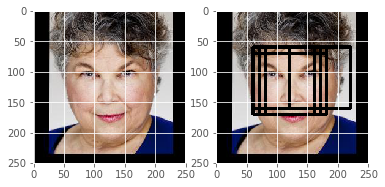

In [36]:

sample_image = np.copy(IM_test[23])
plt.subplot(1,2,1)
plt.imshow(sample_image)
for i in range(0,250 - 100,10):
    for j in range(0,250 - 100,10):
        one_feature = sample_image[i:i + 100,j:j + 100]
        result = model.predict_proba(np.asarray([one_feature]),verbose=False)
        #print(result)
        if result[0][0] > 0.9:
            cv2.rectangle(sample_image,(i,j),(i + 100,j + 100),(0,0,0),3)
plt.subplot(1,2,2)
plt.imshow(sample_image)

In [34]:
result

array([[  8.47991851e-06]], dtype=float32)